# RLMTP Basic Example

This example illustrates the basic functionality of `rlmtp`.

In [1]:
import rlmtp

In [2]:
from IPython.display import Image, IFrame
import matplotlib.pyplot as plt

## Sync stress-strain data with temperature data

Since we record the stress-strain and temperature through two different softwares, we would like to syncronize the measurements. This is done by matching the system times between the two sets of recordings --- rlmtp takes care of this step for you. First, we need to import the data from our different sources. Two functions are provided for this task.

Make sure that the data files follow the established format, otherwise the import will fail.
The format is outlined in the protocol/readme.md file.

In [3]:
path_to_dion_data = '../rlmtp/tests/LP9_1_181211.xlsx'  # contains the stress-strain data
dion_data = rlmtp.import_dion7_data(path_to_dion_data)
path_to_catman_data = '../rlmtp/tests/Temp_LP9_1_181211.XLSX'  # contains the temperature data
catman_data = rlmtp.import_catman_data(path_to_catman_data)

Now we can simply syncronize the data, and add the temperature measurements to the stress-strain measurements.
The syncrhonization is done based on the 'System Date' column that exists within the Dion7 and catman data.
A copy of the Dion7 data is returned with a column of 'Temperature[C]' added to it.

In [4]:
synced_data = rlmtp.sync_temperature(dion_data, catman_data)

The measurement data is now accessed through synced_data. The returned data is a pandas.DataFrame object.

Details on the input / output of all the functions are stored in the `docstrings` of each function and object.

## Process databases stored in the specified format

A protocol is provided for the storage of coupon data, your life is made much easier if you follow this format. In this example the data is loaded automatically, the temperature is synchronized, the synchronized data is output, and plots are generated. In this example, the coupon data stored in the "test_specimen" directory follows our format.

The `coupon_dir` directory below should always follow the specimen directory protocol outlined in protocols/readme.md.

In [5]:
coupon_dir = '../rlmtp/tests/test_specimen/'
output_dir = './'
processed_data = rlmtp.process_specimen_data(coupon_dir, output_dir)

Checking files...
	 Dion7 data exists.
	 catman data exists.
	 Filtering information exists.
Syncing temperature data with Dion7 data...
Filtering the data...


C:\Users\hartlope\AppData\Local\Continuum\Anaconda3\lib\site-packages\rlmtp\filtering.py:43: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x[i_current:i_next], y[i_current:i_next], poly_order)
C:\Users\hartlope\AppData\Local\Continuum\Anaconda3\lib\site-packages\rlmtp\filtering.py:43: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x[i_current:i_next], y[i_current:i_next], poly_order)


Data reduced from 18382 to 2847 data points.
Generating the output...
Finished processing!


The function let's you know what data it finds, if the data is not found then: 1) it does not exist, 2) it is not named properly, or 3) it is not in the correct location. The process_specimen_data() function is useful to easily process entire databases by creating a loop over all the directories that contain coupon data. The processed_data variable contains all the data collected by the function, we'll use it later.

Note that some `RankWarning` warnings may be generated by filtering function, these are generally not a problem, however you should always visually verify that the filtered output looks acceptable.

The output from process_specimen_data is generated in \[output_dir\]/\[coupon_root\], where coupon_root is the name of the directory that contains all the data for the coupon test. In this example the output is in "./test_specimen/", you can see: processed_data.csv, containing the test data; stress_strain_plot.pdf, the true stress - true strain plot; and temperature_time_plot.pdf, the temperature plotted versus time. Let's look at the temperature response:

In [6]:
IFrame("./test_specimen/temperature_time_plot.pdf", width=400, height=300)

From this plot we can see that the temperature rise is between 6 to 7 degrees Celcius for this specimen. Finally, let's plot the temperature versus true strain. For this, we'll need to use the data in `processed_data` because the plot is not generated automatically.

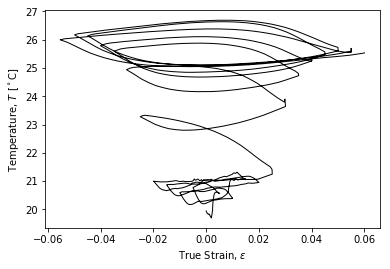

In [7]:
plt.figure()
plt.plot(processed_data['e_true'], processed_data['Temperature[C]'], c='k', lw=1.0)
plt.xlabel(r'True Strain, $\varepsilon$')
plt.ylabel(r'Temperature, $T$ [$^\circ$C]')
plt.show()

Now we can see that the temperature rise is mainly attributed to the cycles after 2 % strain, this is primarily because the strain rate increases at this point.

## Processing several coupons

The `process_specimen_data` function described above allows you to easily process several specimens at the same time.
In this example we first make a list of the specimen directories we would like to process, then use a `for` loop to process each directory.
The outputs for each specimen will be placed in a seperate folder.

In [13]:
coupon_dir = ['../rlmtp/tests/test_specimen/', '../rlmtp/tests/test_specimen_2/']
output_dir = './'
for cdir in coupon_dir:
    rlmtp.process_specimen_data(cdir, output_dir)

Checking files...
	 Dion7 data exists.
	 catman data exists.
	 Filtering information exists.
Syncing temperature data with Dion7 data...
Filtering the data...


C:\Users\hartlope\AppData\Local\Continuum\Anaconda3\lib\site-packages\rlmtp\filtering.py:43: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x[i_current:i_next], y[i_current:i_next], poly_order)
C:\Users\hartlope\AppData\Local\Continuum\Anaconda3\lib\site-packages\rlmtp\filtering.py:43: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x[i_current:i_next], y[i_current:i_next], poly_order)


Data reduced from 18382 to 2847 data points.
Generating the output...
Finished processing!
Checking files...
	 Dion7 data exists.
	 catman data does NOT exist.
	 Filtering information exists.
Filtering the data...
Data reduced from 6483 to 377 data points.
Generating the output...
Finished processing!


Entire databases can be rapidly processed using this method.
Note that the [os.listdir and os.walk](https://docs.python.org/3/library/os.html) functions can be very powerful for collecting all the specimen directories.

## Capture images at specified time steps

VERY IMPORTANT: This functionality requires that ffmpeg is installed (equivalently, ffmpeg and ffprobe are on the Path) on your system. ffmpeg is a free software, the pre-compiled binaries are available at: https://www.ffmpeg.org/download.html.

We may be interested to correlate the deformed shape of a specimen with particular time increments, for example to see if buckling has occured. For this example we need to load a new data set, and make sure we have the path to the video file of interest.

In [8]:
path_to_dion_data_2 = '../rlmtp/tests/testData_07012018.xlsx'
dion_data_2 = rlmtp.import_dion7_data(path_to_dion_data_2)
video = '../rlmtp/tests/D5600_B_254_132139_589.MOV'  # this file may not exist for you since it's around 1Gb we don't include it

For the following commands to work, rlmtp requires that the video starts before the Dion7 recordings, and ends after the Dion7 recordings. Therefore, take care when you are starting and stopping the video. In this example, we are interested in seeing if buckling has occured at the excursion to -5.5 % strain. We identified this as the 18059'th time increment. First, we get the time in the Dion7 data corresponding to this increment, then find how many seconds into the video this time occurs.

In [9]:
time_55_strain = dion_data_2.get_times_at_increments([18059])
video_time = rlmtp.dion7_times_to_video_times(video, time_55_strain)

In the above command, multiple increments can be added to the list (in ascending order) to get multiple times, however we just wanted one picture. Now we use the time from Dion7 to capture the frames from the video. The pictures are saved in jpeg format to output_dir, with the format [file\_name]\_[S]\_[ms].jpg, where S is the seconds in the video, and ms are the milliseconds.

In [10]:
output_dir = './'
file_name = 'ex_1_pic'
rlmtp.output_frames_at_times(video, video_time, output_dir, file_name)

C:\Users\hartlope\AppData\Local\Continuum\Anaconda3\lib\site-packages\rlmtp\sync_video.py:111: UserWarning: ./ex_1_pic_916_394.jpg already exists, no new file created!
  warnings.warn(out_path + ' already exists, no new file created!')


Now you can load the image and see the results.

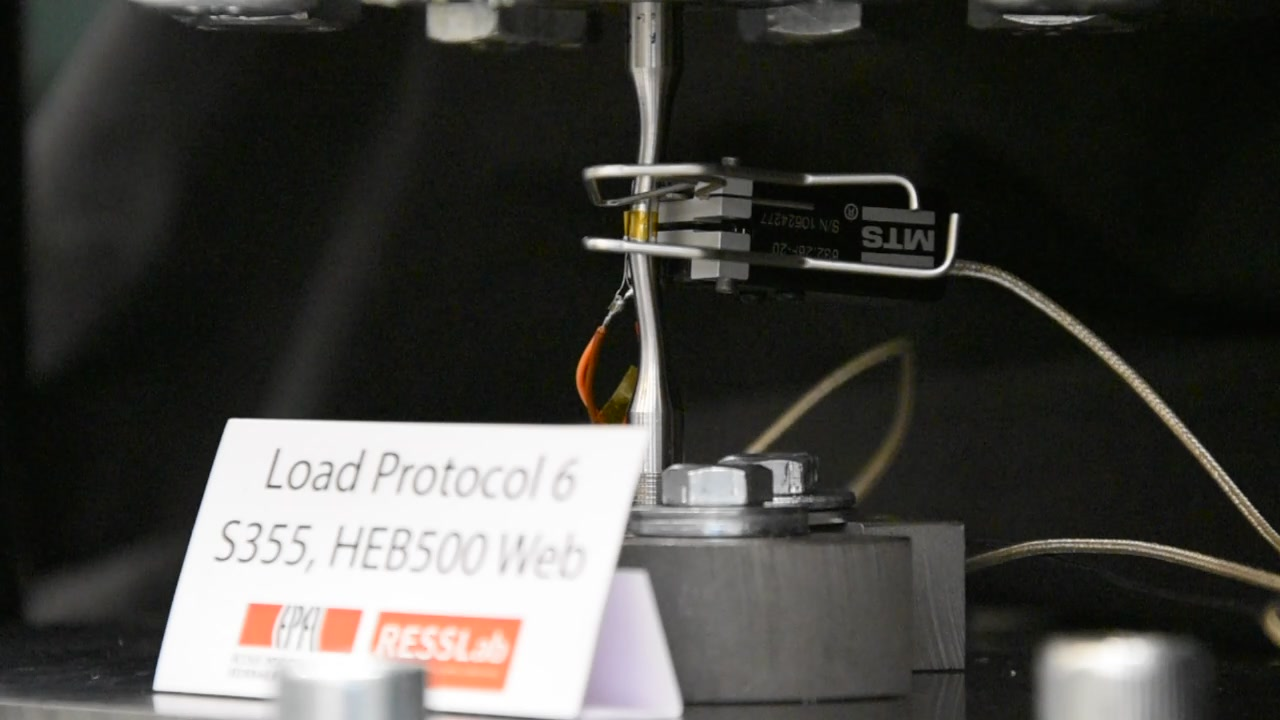

In [11]:
Image("./ex_1_pic_916_394.jpg")

Clearly buckling has occured at this stage!

## Database generation

If the protocols for specimen and database management are followed, a summary of all the tests can be generated automatically.
This is done through the write_description_database_csv function.
The function automatically walks through the database collecting all the specimen description information, then compiling it into a single file.

In [12]:
database_dir = '../rlmtp/tests/test_database/'
csv_output = './example_database.csv'
rlmtp.write_description_database_csv(database_dir, csv_output)

Found ../rlmtp/tests/test_database/campaign_1\LP1\Specimen 1\specimen_description.csv, adding to database...
Found ../rlmtp/tests/test_database/campaign_2\LP1\Specimen 1\specimen_description.csv, adding to database...


C:\Users\hartlope\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
